In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

aapl = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
msft = yf.download("MSFT", start="2020-01-01", end="2024-12-31")

aapl = aapl[['Close']]
msft = msft[['Close']]

aapl.rename(columns={'Close': 'AAPL'}, inplace=True)
msft.rename(columns={'Close': 'MSFT'}, inplace=True)

df = aapl.join(msft, how='inner')

returns = df.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-46e25b1b1fc2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl.rename(columns={'Close': 'AAPL'}, inplace=True)


In [ ]:
print(df.head(10))
print(returns)

Price            AAPL        MSFT
Ticker           AAPL        MSFT
Date                             
2020-01-02  72.716064  153.630692
2020-01-03  72.009125  151.717728
2020-01-06  72.582886  152.109894
2020-01-07  72.241539  150.722992
2020-01-08  73.403648  153.123779
2020-01-09  74.962791  155.036713
2020-01-10  75.132263  154.319382
2020-01-13  76.737411  156.174957
2020-01-14  75.701187  155.074997
2020-01-15  75.376801  156.079300
Price           AAPL      MSFT
Ticker          AAPL      MSFT
Date                          
2020-01-03 -0.009722 -0.012452
2020-01-06  0.007968  0.002585
2020-01-07 -0.004703 -0.009118
2020-01-08  0.016086  0.015928
2020-01-09  0.021241  0.012493
...              ...       ...
2024-12-23  0.003065 -0.003092
2024-12-24  0.011478  0.009374
2024-12-26  0.003176 -0.002777
2024-12-27 -0.013242 -0.017302
2024-12-30 -0.013263 -0.013240

[1256 rows x 2 columns]


In [ ]:
#shapirotest

shapiro_test_aapl = stats.shapiro(returns['AAPL'])
print(shapiro_test_aapl)
shapiro_test_msft = stats.shapiro(returns['MSFT'])
print(shapiro_test_msft)


ShapiroResult(statistic=0.9422826106974985, pvalue=1.0228068999498494e-21)
ShapiroResult(statistic=0.9357510990862418, pvalue=7.527604381950096e-23)


In [ ]:
#Jb test

jb_test_aapl = stats.jarque_bera(returns['AAPL'])
jb_test_msft = stats.jarque_bera(returns['MSFT'])

print(jb_test_aapl)
print(jb_test_msft)

SignificanceResult(statistic=1443.40535358985, pvalue=0.0)
SignificanceResult(statistic=2625.294965905387, pvalue=0.0)


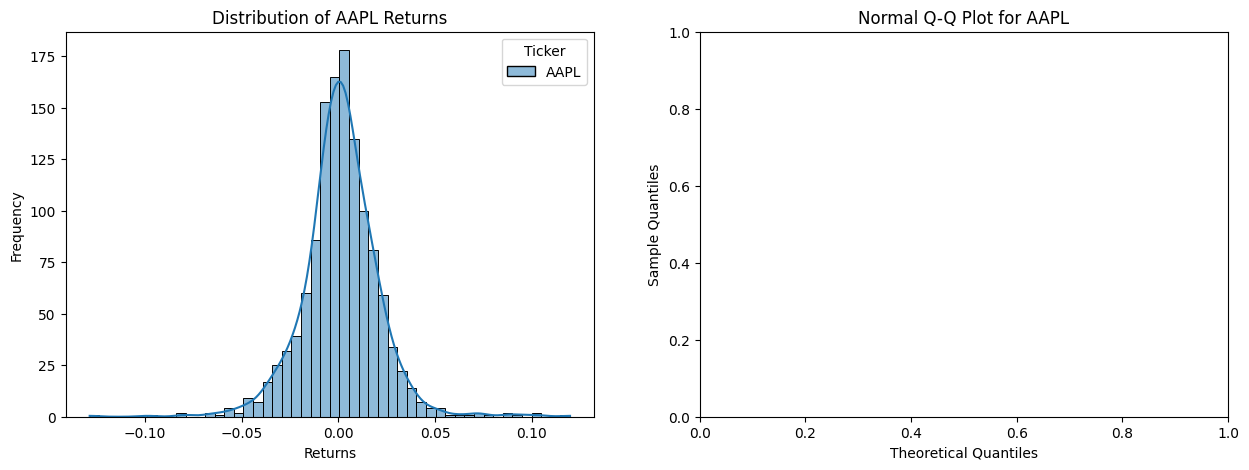

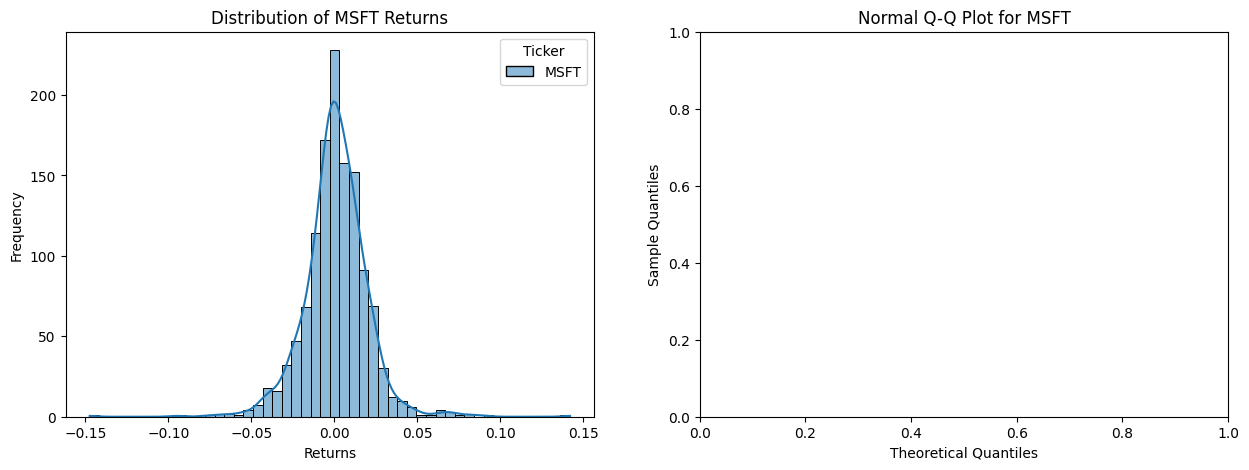

In [ ]:

def plotdata(data, asset_name):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data=data, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {asset_name} Returns")
    axes[0].set_xlabel("Returns")
    axes[0].set_ylabel("Frequency")

    data_array = np.array(data)
    data_array = data_array[~np.isnan(data_array)]

    probplot_data = stats.probplot(data_array)
    axes[1].scatter(probplot_data[0][0], probplot_data[0][1], color='blue', alpha=0.5)
    axes[1].plot(probplot_data[0][0], probplot_data[0][0] * probplot_data[1][0] + probplot_data[1][1],
                 color='red', linestyle='--')
    axes[1].set_title(f'Normal Q-Q Plot for {asset_name}')
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Sample Quantiles')


    return fig


plotdata(returns['AAPL'], "AAPL")
plt.show()

plotdata(returns['MSFT'], "MSFT")
plt.show()

In [ ]:
print(np.mean(returns["AAPL"]))
print(np.std(returns["AAPL"]))
print("___"*70)
print(np.mean(returns["MSFT"]))
print(np.std(returns["MSFT"]))

0.0011886709081100708
Ticker
AAPL    0.019954
dtype: float64
__________________________________________________________________________________________________________________________________________________________________________________________________________________
0.0009948483019292743
Ticker
MSFT    0.01921
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Pearson Correlation Coefficient: 0.7483
P-value: 9.1529e-226


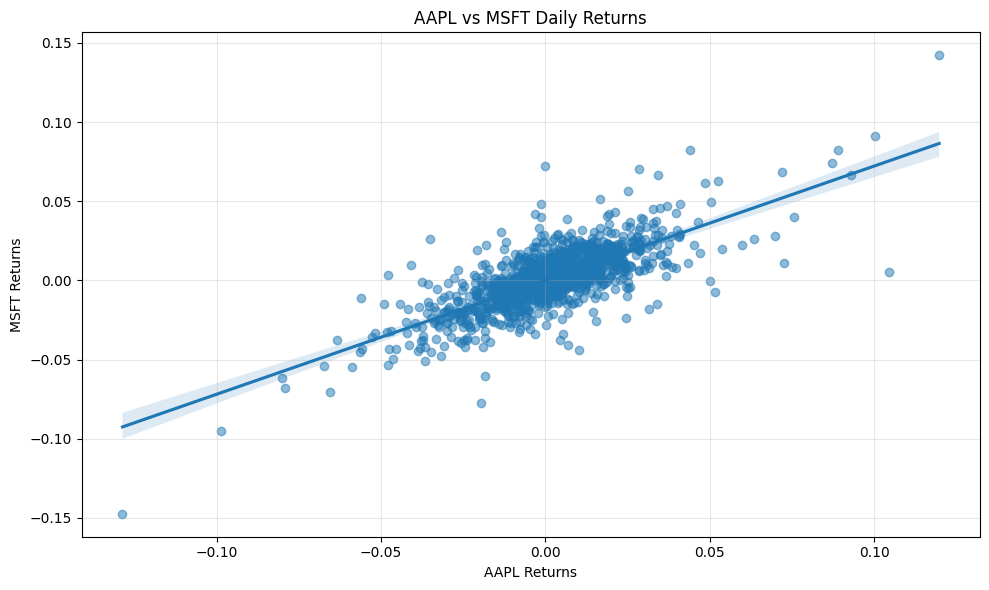

In [ ]:


aapl_returns = returns['AAPL'].values.ravel()
msft_returns = returns['MSFT'].values.ravel()


correlation, p_value = stats.pearsonr(aapl_returns, msft_returns)

print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

plt.figure(figsize=(10, 6))
sns.regplot(x=aapl_returns, y=msft_returns, scatter_kws={'alpha':0.5})
plt.title('AAPL vs MSFT Daily Returns')
plt.xlabel('AAPL Returns')
plt.ylabel('MSFT Returns')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Pearson: 0.7483
Pearson P-value: 9.1529e-226

Spearman: 0.7004
Spearman's P-value: 6.7773e-186

Kendall Tau: 0.5232
Kendall P-value: 8.3234e-170


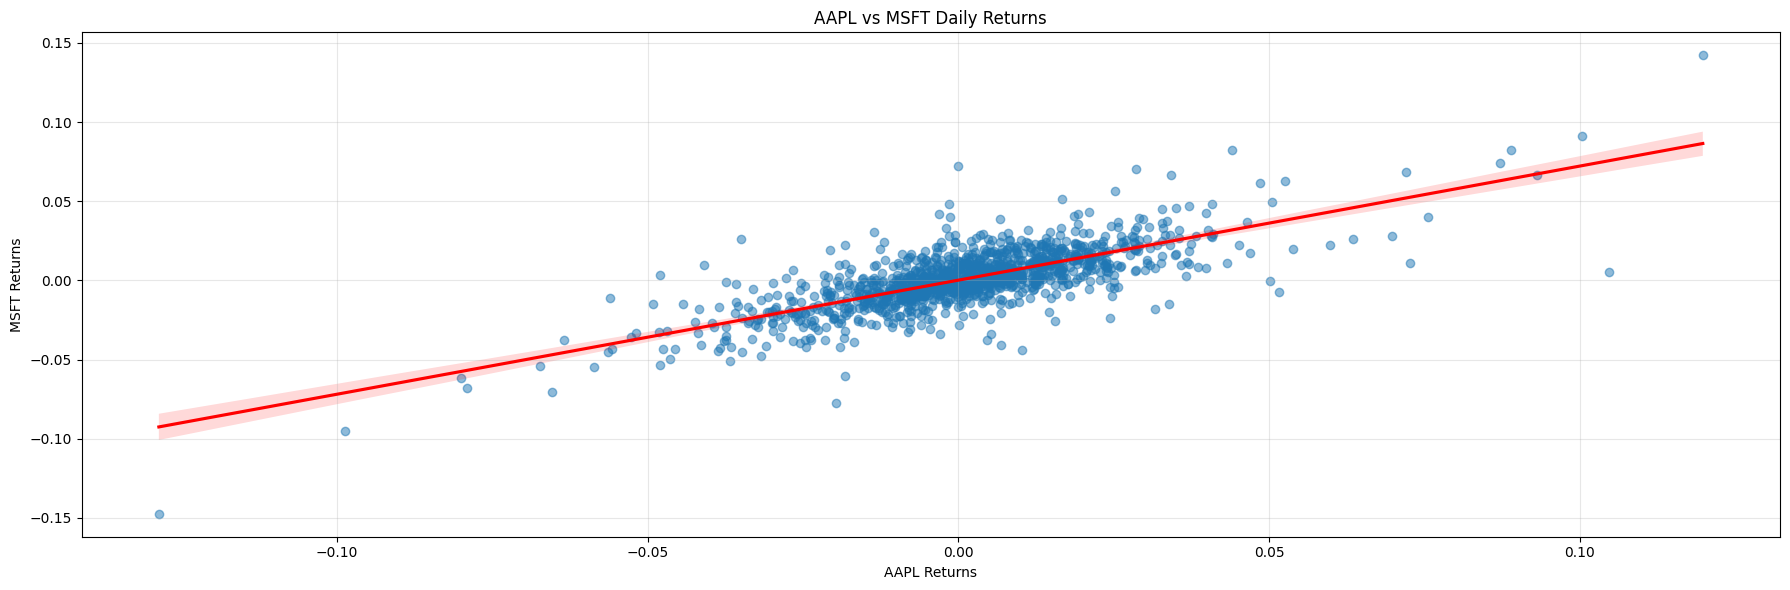

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


aapl_returns = returns['AAPL'].values.ravel()
msft_returns = returns['MSFT'].values.ravel()


pearson_corr, p_value_pearson = stats.pearsonr(aapl_returns, msft_returns)

spearman_corr, p_value_spearman = stats.spearmanr(aapl_returns, msft_returns)

kendall_corr, p_value_kendall = stats.kendalltau(aapl_returns, msft_returns)


print(f"\nPearson: {pearson_corr:.4f}")
print(f"Pearson P-value: {p_value_pearson:.4e}")
print()
print(f"Spearman: {spearman_corr:.4f}")
print(f"Spearman's P-value: {p_value_spearman:.4e}")
print()
print(f"Kendall Tau: {kendall_corr:.4f}")
print(f"Kendall P-value: {p_value_kendall:.4e}")


fig, (ax1) = plt.subplots(1, 1, figsize=(18, 6))


sns.regplot(x=aapl_returns, y=msft_returns, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax1)
ax1.set_title('AAPL vs MSFT Daily Returns')
ax1.set_xlabel('AAPL Returns')
ax1.set_ylabel('MSFT Returns')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The results from the Shapiro-Wilk test and the Jarque-Bera test indicate that the stock returns for both AAPL and MSFT significantly deviate from normality. The Shapiro test, even though the W statistic shows a close to normal distribution with the W statistic scores of .94 and .93, the low P-value scores for both reject the null hypothesis of normality. The Jarque-Bera test also strongly rejects normality as it gives very high values. The values measure the deviation from normality based on skewness and kurtosis. A higher JB statistic means a greater departure from normality. So in all, the data is not normally distributed.

AAPL and MSFT returns have a strong, statistically significant positive correlation. This means their prices tend to move together because the Pearson correlation shows a pretty high value, approx. 0.7, which is closer to 1. The one thing to consider is that the Pearson correlation assumes normality in the data, which the AAPL and MSFT returns violate, potentially leading to unreliable results. The other measures show a strong relation, but the gap between Pearson and Spearman, approx. 0.048, likely reflects the impact of outliers typical in financial returns, as Pearson can be inflated by extreme values. There is also a major difference in Pearson and Kendall, which could be explained by the violation of normality.

In all, the use of alternative measures may allow us to see when certain assumptions are broken based on differences in the relations being described by these tests. The difference between Kendall and Pearson showcases that the assumption of normality was wrong, and something needs to be fixed or altered to be interpreted. So for further analysis of the returns of AAPL and MSFT, exploring correlation measures that do not assume normality may be an option to allow more accurate interpretations of the data. This will allow us to understand the underlying trends by connecting the right data to the right statistical methods. Additionally, non-parametric approaches such as robust correlation techniques or rank-based methods like Spearman's rho and Kendall's tau could provide better insights into the dependence structure of stock returns. Understanding these differences helps in choosing the best statistical tool for financial data analysis.